In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Big-Data/PROJECT/Uber_data_jan-jun.csv', parse_dates=[0], sep=',')
df=df.sort(['neighbourhood','Date'])
gb = df.groupby('neighbourhood' )    
neighborDf=[gb.get_group(x) for x in gb.groups]



In [2]:
def sum_week_after(row):
    return df['count'].iloc[row['today_index']:row['end_week_after']+1].sum()
def sum_week_before(row):
    return df['count'].iloc[row['start_week_before']:row['today_index']+1].sum()



In [3]:
weekBefore={}
weekAfter={}

In [4]:
import datetime as dt
for df in neighborDf:
    neighborIndex=df['neighbourhood'].unique()[0]
    newIndex=range(len(df))
    
    df=df.set_index([newIndex])
    df['today_index'] = df.index
    start_dates = df['Date'] - pd.Timedelta(days=7)
    df['start_week_before'] = df['Date'].values.searchsorted(start_dates, side='right')
    end_date = df['Date'] + pd.Timedelta(days=7)
    df['end_week_after'] = df['Date'].values.searchsorted(end_date, side='left')
    df['count_week_after'] = df.apply(sum_week_after, axis=1)
    df['count_week_before'] = df.apply(sum_week_before, axis=1)
    #print df[['Date','count','count_week_before','count_week_after']]
    df['Date']=df['Date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
    dfToSave = df[['Date','count_week_before','count_week_after']]    
    weekBefore[neighborIndex]=dfToSave.set_index('Date')['count_week_before'].to_dict()
    weekAfter[neighborIndex]= dfToSave.set_index('Date')['count_week_after'].to_dict()

In [5]:
#weekBefore['Bedford Park']

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline  
import math
def plotByNeibor(neighbourhood,savePlot):
    dict1=weekAfter[neighbourhood]
    dict2=weekBefore[neighbourhood]
    diff = {key: float(dict1[key]-dict2[key])/float(dict1[key]+dict2[key]) for key in dict1 if key in dict2}
    absDiff = map(abs, diff.values())
    plt.xticks(range(1,len(diff),50), diff.keys())
    plt.clf()
    if savePlot:
        neighbourhood=neighbourhood.replace("/","-")
        filename="plots/"+neighbourhood+".jpeg"
        plt.plot(absDiff)
        plt.xticks(range(1,len(diff),50), diff.keys())
        plt.savefig(filename)
    else:
        plt.plot(weekAfter[neighbourhood].values())
        plt.plot(weekBefore[neighbourhood].values())
        plt.show()
        plt.plot(absDiff)
        plt.xticks(range(1,len(diff),50), diff.keys())
        plt.show()        
    plt.gcf()

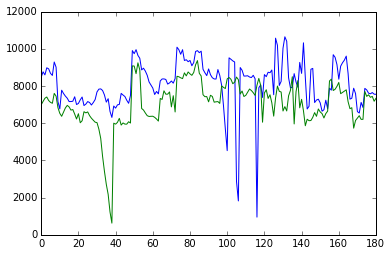

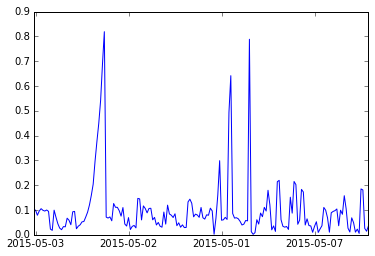

In [7]:
plotByNeibor('Upper West Side South',False)

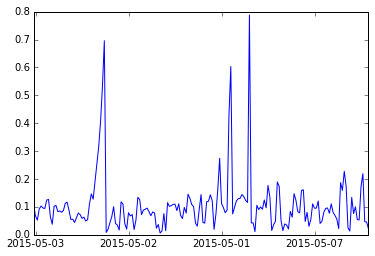

In [8]:
for k in weekAfter.keys():
    plotByNeibor(k,True)

In [13]:
neighbourhood='Upper West Side South'
dict1=weekAfter[neighbourhood]
dict2=weekBefore[neighbourhood]
diff = {key: (dict1[key]-dict2[key]) for key in dict1 if key in dict2 and dict1[key]-dict2[key]>4000}
diff

{'2015-01-01': 5683,
 '2015-01-02': 5403,
 '2015-01-03': 5144,
 '2015-01-04': 4419,
 '2015-01-05': 4105}

In [17]:
print dict1['2015-01-01']
print dict2['2015-01-01']

6311
628
